# 📊 Employee Efficiency Analysis — Office vs Remote vs Hybrid

### 🎯 Objective
Analyze which type of employees (Office, Remote, or Hybrid) work more efficiently — based on productivity, wellbeing, and work-related factors.

### 📁 Dataset
**File:** `Hybrid_Office_Predictor_Cleaned1.xlsx`  
**Columns:** Departments, Productivity_Score, Wellbeing_Score, Working Hours, Tasks, etc.

### 🧰 Tools Used
Python, Pandas, Seaborn, Matplotlib, SciPy, Scikit-learn


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_excel('maindataset.xlsx')
df

,Current Working platform?,Working hrs/week,Effective working hours,Completed projects,Experience,QA,DevOps,PM,Problem-solving,security technical,version control,UI/UX design,prefer working in team or solo,Does your team provide you support at work whenever needed?,provide resources and tools,clear work objectives,constructive feedback,training in hybrid work.,Preferred working platform
0,hybrid,41,6,7,Intermediate,Yes,No,Yes,yes,No,yes,no,based on task,yes,always,daily,only during evaluation,yes,hybrid
1,hybrid,41,5,7,Intermediate,Yes,No,Yes,no,No,no,yes,both,sometimes,never,weekly,sometimes,No,hybrid
2,hybrid,40,7,3,Beginner,No,No,No,yes,No,yes,no,solo,sometimes,always,projectwise,sometimes,No,hybrid
3,office,40,6,9,Beginner,No,No,No,no,No,no,no,solo,yes,never,projectwise,only during evaluation,No,online platform
4,remote,40,6,9,Beginner,No,No,No,no,No,no,yes,both,yes,always,weekly,only during evaluation,No,official platform
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,hybrid,40,7,2,Intermediate,Yes,No,Yes,Yes,No,Yes,Yes,team,sometimes,never,projectwise,only during evaluation,No,hybrid
1005,remote,40,6,5,expert,Yes,Yes,Yes,Yes,Yes,Yes,Yes,team,no,never,daily,only during evaluation,No,official platform
1006,remote,40,6,7,Intermediate,Yes,No,Yes,Yes,No,Yes,no,based on task,no,always,daily,sometimes,yes,hybrid
1007,office,42,6,3,Intermediate,Yes,No,Yes,Yes,No,Yes,Yes,both,yes,never,daily,regularly,No,official platform


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 19 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Current Working platform?                                    1009 non-null   object
 1   Working  hrs/week                                            1009 non-null   int64 
 2   Effective working hours                                      1009 non-null   int64 
 3   Completed projects                                           1009 non-null   int64 
 4   Experience                                                   1009 non-null   object
 5   QA                                                           1009 non-null   object
 6    DevOps                                                      1009 non-null   object
 7   PM                                                           1009 non-null   object
 8 

In [55]:
df.columns = df.columns.str.strip()

In [56]:
df = df.rename(columns={'training in hybrid work.': 'training in hybrid work'})

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 19 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Current Working platform?                                    1009 non-null   object
 1   Working  hrs/week                                            1009 non-null   int64 
 2   Effective working hours                                      1009 non-null   int64 
 3   Completed projects                                           1009 non-null   int64 
 4   Experience                                                   1009 non-null   object
 5   QA                                                           1009 non-null   object
 6   DevOps                                                       1009 non-null   object
 7   PM                                                           1009 non-null   object
 8 

## Removing unwanted columns

In [58]:
df = df.drop(columns=['QA', 'DevOps', 'PM', 'Problem-solving', 'security technical', 'version control', 'UI/UX design'])

In [59]:
df

,Current Working platform?,Working hrs/week,Effective working hours,Completed projects,Experience,prefer working in team or solo,Does your team provide you support at work whenever needed?,provide resources and tools,clear work objectives,constructive feedback,training in hybrid work,Preferred working platform
0,hybrid,41,6,7,Intermediate,based on task,yes,always,daily,only during evaluation,yes,hybrid
1,hybrid,41,5,7,Intermediate,both,sometimes,never,weekly,sometimes,No,hybrid
2,hybrid,40,7,3,Beginner,solo,sometimes,always,projectwise,sometimes,No,hybrid
3,office,40,6,9,Beginner,solo,yes,never,projectwise,only during evaluation,No,online platform
4,remote,40,6,9,Beginner,both,yes,always,weekly,only during evaluation,No,official platform
...,...,...,...,...,...,...,...,...,...,...,...,...
1004,hybrid,40,7,2,Intermediate,team,sometimes,never,projectwise,only during evaluation,No,hybrid
1005,remote,40,6,5,expert,team,no,never,daily,only during evaluation,No,official platform
1006,remote,40,6,7,Intermediate,based on task,no,always,daily,sometimes,yes,hybrid
1007,office,42,6,3,Intermediate,both,yes,never,daily,regularly,No,official platform


## Adding required columns

In [60]:
df['Emp_id'] = ['EMP' + str(i).zfill(4) for i in range(1, len(df) + 1)]

In [61]:
departments = ['QA', 'DevOps', 'Software Developer', 'Data Analyst', 'Support', 'Product Manager', 'AI Engineer']
df['departments'] = np.random.choice(departments, size = len(df))

In [62]:
df['Task_per_day'] = (df['Completed projects']/7).round(2)

In [63]:
df['Productivity_Score'] = df['Effective working hours']/df['Completed projects']
df['Productivity_Score'] = (((df['Productivity_Score'] - df['Productivity_Score'].min()) / (df['Productivity_Score'].max() - df['Productivity_Score'].min()))*10).round(1)

In [64]:
locations = ['Bangalore', 'Coimbatore', 'Kerala', 'Chennai', 'Hyderabad']
df['location'] = np.random.choice(locations, size=len(df))

In [65]:
wellbeing_cols = [
    'Does your team provide you support at work whenever needed?',
    'provide resources and tools',
    'clear work objectives',
    'constructive feedback',
    'training in hybrid work.'
]

available_cols = [col for col in wellbeing_cols if col in df.columns]

mapping = {
    'yes': 1, 'always': 1, 'regularly': 1, 'daily': 1,
    'sometimes': 0.5, 'weekly': 0.5, 'projectwise': 0.8, 'only during evaluation': 0.3,
    'no': 0, 'never': 0
}

temp_df = df[available_cols].copy()

temp_df = temp_df.apply(lambda x: x.astype(str).str.strip().str.lower())
temp_df = temp_df.replace(mapping)

temp_df = temp_df.apply(pd.to_numeric, errors='coerce')

df['wellbeing_score'] = temp_df.mean(axis=1).round(2)

In [66]:
df['hire_date'] = pd.to_datetime(
    np.random.choice(pd.date_range('2000-01-01', '2004-09-30'), len(df))
)

In [67]:
# Correct way to calculate months of tenure
today = pd.Timestamp('2025-10-01')
df['months_tenure'] = (today.year - df['hire_date'].dt.year) * 12 + (today.month - df['hire_date'].dt.month)

In [68]:
df['hire_cohort'] = df['hire_date'].dt.to_period('Q')

In [69]:
months = pd.date_range('2024-10-01', '2025-09-30', freq='MS')
trend_data = []
for _, row in df.iterrows():
    for m in months:
        trend_data.append({
            'Employee_ID': row['Employee_ID'] if 'Employee_ID' in df.columns else _,
            'month': m,
            'Productivity_Score': row['Productivity_Score'] * np.random.uniform(0.8, 1.2),
            'Current Working platform?': row['Current Working platform?']
        })
df_trend = pd.DataFrame(trend_data)

In [70]:
def categorize_employee(row):
    if row['Productivity_Score'] >= df['Productivity_Score'].median() and row['wellbeing_score'] >= df['wellbeing_score'].median():
        return "High Performers - Happy"
    elif row['Productivity_Score'] >= df['Productivity_Score'].median() and row['wellbeing_score'] < df['wellbeing_score'].median():
        return "High Performers - Burnout Risk"
    elif row['Productivity_Score'] < df['Productivity_Score'].median() and row['wellbeing_score'] >= df['wellbeing_score'].median():
        return "Developing Talent"
    else:
        return "Intervention Needed"

df['Employee_Segment'] = df.apply(categorize_employee, axis=1)

In [71]:
df.isnull().sum()

Current Working platform?                                      0
Working  hrs/week                                              0
Effective working hours                                        0
Completed projects                                             0
Experience                                                     0
prefer working in team or solo                                 0
Does your team provide you support at work whenever needed?    0
provide resources and tools                                    0
clear work objectives                                          0
constructive feedback                                          0
training in hybrid work                                        0
Preferred working platform                                     0
Emp_id                                                         0
departments                                                    0
Task_per_day                                                   0
Productivity_Score       

In [72]:
df.columns

Index(['Current Working platform?', 'Working  hrs/week',
       'Effective working hours', 'Completed projects', 'Experience',
       'prefer working in team or solo',
       'Does your team provide you support at work whenever needed?',
       'provide resources and tools', 'clear work objectives',
       'constructive feedback', 'training in hybrid work',
       'Preferred working platform', 'Emp_id', 'departments', 'Task_per_day',
       'Productivity_Score', 'location', 'wellbeing_score', 'hire_date',
       'months_tenure', 'hire_cohort', 'Employee_Segment'],
      dtype='object')

In [73]:
desired_order = [
    'Emp_id',
    'departments',
    'location',
    'Current Working platform?',
    'Preferred working platform',
    'Working  hrs/week',
    'Effective working hours',
    'Task_per_day',
    'Completed projects',
    'Experience',
    'prefer working in team or solo',
    'Does your team provide you support at work whenever needed?',
    'provide resources and tools',
    'clear work objectives',
    'constructive feedback',
    'training in hybrid work',
    'Productivity_Score',
    'wellbeing_score',
    'hire_date',
    'months_tenure',
    'hire_cohort',
    'Employee_Segment'
]

In [74]:
df = df[desired_order]

In [75]:
df

,Emp_id,departments,location,Current Working platform?,Preferred working platform,Working hrs/week,Effective working hours,Task_per_day,Completed projects,Experience,...,provide resources and tools,clear work objectives,constructive feedback,training in hybrid work,Productivity_Score,wellbeing_score,hire_date,months_tenure,hire_cohort,Employee_Segment
0,EMP0001,Product Manager,Bangalore,hybrid,hybrid,41,6,1.00,7,Intermediate,...,always,daily,only during evaluation,yes,1.0,0.82,2003-02-06,272,2003Q1,High Performers - Happy
1,EMP0002,Product Manager,Hyderabad,hybrid,hybrid,41,5,1.00,7,Intermediate,...,never,weekly,sometimes,No,0.5,0.38,2001-05-16,293,2001Q2,Intervention Needed
2,EMP0003,Support,Coimbatore,hybrid,hybrid,40,7,0.43,3,Beginner,...,always,projectwise,sometimes,No,6.0,0.70,2002-08-02,278,2002Q3,High Performers - Happy
3,EMP0004,DevOps,Bangalore,office,online platform,40,6,1.29,9,Beginner,...,never,projectwise,only during evaluation,No,0.4,0.52,2000-01-07,309,2000Q1,Intervention Needed
4,EMP0005,Software Developer,Chennai,remote,official platform,40,6,1.29,9,Beginner,...,always,weekly,only during evaluation,No,0.4,0.70,2001-05-26,293,2001Q2,Developing Talent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,EMP1005,QA,Hyderabad,hybrid,hybrid,40,7,0.29,2,Intermediate,...,never,projectwise,only during evaluation,No,10.0,0.40,2004-02-04,260,2004Q1,High Performers - Burnout Risk
1005,EMP1006,AI Engineer,Bangalore,remote,official platform,40,6,0.71,5,expert,...,never,daily,only during evaluation,No,2.2,0.32,2001-10-11,288,2001Q4,High Performers - Burnout Risk
1006,EMP1007,Support,Chennai,remote,hybrid,40,6,1.00,7,Intermediate,...,always,daily,sometimes,yes,1.0,0.62,2000-07-17,303,2000Q3,High Performers - Happy
1007,EMP1008,DevOps,Hyderabad,office,official platform,42,6,0.43,3,Intermediate,...,never,daily,regularly,No,4.9,0.75,2003-06-05,268,2003Q2,High Performers - Happy


In [76]:
df['departments'].unique()

array(['Product Manager', 'Support', 'DevOps', 'Software Developer',
       'Data Analyst', 'AI Engineer', 'QA'], dtype=object)

In [77]:
# Trim extra spaces and standardize text case
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [78]:
# Normalize experience
df['Experience'] = df['Experience'].str.strip().str.capitalize()

In [102]:
df.columns = df.columns.str.strip().str.replace('\xa0', '').str.lower()

In [103]:
df

,emp_id,departments,location,current working platform?,preferred working platform,working hrs/week,effective working hours,task_per_day,completed projects,experience,...,training in hybrid work,productivity_score,wellbeing_score,hire_date,months_tenure,hire_cohort,employee_segment,prod_norm,well_norm,overall_score
0,emp0001,product manager,bangalore,hybrid,hybrid,41,6,1.00,7,Intermediate,...,yes,1.0,0.82,2003-02-06,272,2003Q1,high performers - happy,0.10,0.843373,0.397349
1,emp0002,product manager,hyderabad,hybrid,hybrid,41,5,1.00,7,Intermediate,...,no,0.5,0.38,2001-05-16,293,2001Q2,intervention needed,0.05,0.313253,0.155301
2,emp0003,support,coimbatore,hybrid,hybrid,40,7,0.43,3,Beginner,...,no,6.0,0.70,2002-08-02,278,2002Q3,high performers - happy,0.60,0.698795,0.639518
3,emp0004,devops,bangalore,office,online platform,40,6,1.29,9,Beginner,...,no,0.4,0.52,2000-01-07,309,2000Q1,intervention needed,0.04,0.481928,0.216771
4,emp0005,software developer,chennai,remote,official platform,40,6,1.29,9,Beginner,...,no,0.4,0.70,2001-05-26,293,2001Q2,developing talent,0.04,0.698795,0.303518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,emp1005,qa,hyderabad,hybrid,hybrid,40,7,0.29,2,Intermediate,...,no,10.0,0.40,2004-02-04,260,2004Q1,high performers - burnout risk,1.00,0.337349,0.734940
1005,emp1006,ai engineer,bangalore,remote,official platform,40,6,0.71,5,Expert,...,no,2.2,0.32,2001-10-11,288,2001Q4,high performers - burnout risk,0.22,0.240964,0.228386
1006,emp1007,support,chennai,remote,hybrid,40,6,1.00,7,Intermediate,...,yes,1.0,0.62,2000-07-17,303,2000Q3,high performers - happy,0.10,0.602410,0.300964
1007,emp1008,devops,hyderabad,office,official platform,42,6,0.43,3,Intermediate,...,no,4.9,0.75,2003-06-05,268,2003Q2,high performers - happy,0.49,0.759036,0.597614


In [80]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Working hrs/week,1009.0,40.54113,40.0,40.0,40.0,41.0,44.0,1.01699
Effective working hours,1009.0,6.010902,5.0,6.0,6.0,6.0,7.0,0.249762
Task_per_day,1009.0,0.793419,0.29,0.43,1.0,1.0,1.29,0.355536
Completed projects,1009.0,5.544103,2.0,3.0,7.0,7.0,9.0,2.488921
Productivity_Score,1009.0,2.922101,0.0,1.0,1.0,4.9,10.0,2.694519
wellbeing_score,1009.0,0.567344,0.12,0.45,0.57,0.7,0.95,0.179287
hire_date,1009,2002-05-15 20:17:21.823587584,2000-01-01 00:00:00,2001-03-26 00:00:00,2002-05-29 00:00:00,2003-07-16 00:00:00,2004-09-27 00:00:00,NaN
months_tenure,1009.0,281.029732,253.0,267.0,281.0,295.0,309.0,16.399136


In [81]:
df.isnull().sum()

Emp_id                                                         0
departments                                                    0
location                                                       0
Current Working platform?                                      0
Preferred working platform                                     0
Working  hrs/week                                              0
Effective working hours                                        0
Task_per_day                                                   0
Completed projects                                             0
Experience                                                     0
prefer working in team or solo                                 0
Does your team provide you support at work whenever needed?    0
provide resources and tools                                    0
clear work objectives                                          0
constructive feedback                                          0
training in hybrid work  

In [82]:
df['Current Working platform?'].value_counts()

Current Working platform?
hybrid    465
office    334
remote    210
Name: count, dtype: int64

## 1. Productivity & Wellbeing Comparisons

### a) Distribution of Productivity by Work Mode

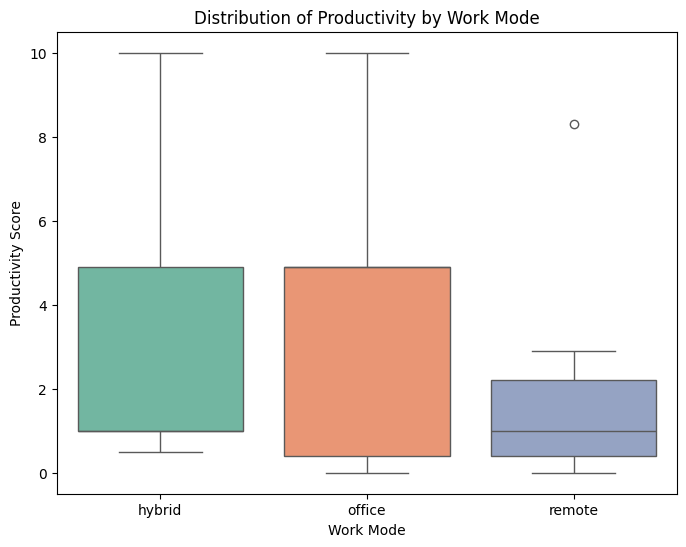

In [83]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Current Working platform?', y='Productivity_Score', data=df, palette='Set2')
plt.xlabel('Work Mode')
plt.ylabel('Productivity Score')
plt.title('Distribution of Productivity by Work Mode')
plt.show()

### b) Average Productivity score by each department & platform

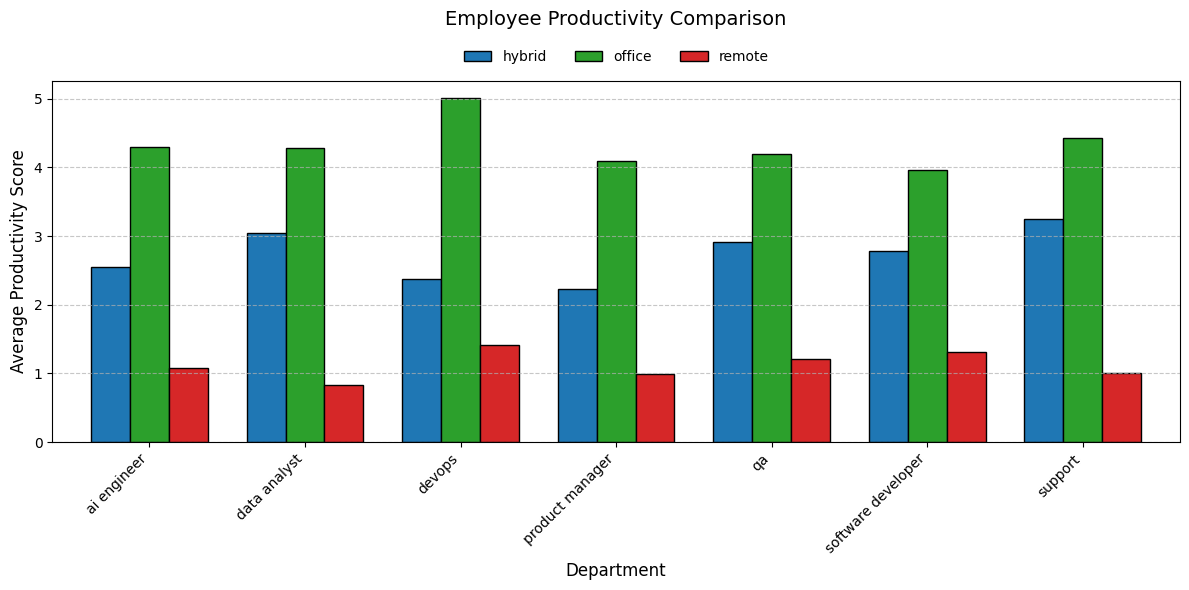

In [84]:
avg_productivity = df.groupby(['departments', 'Current Working platform?'])['Productivity_Score'].mean().unstack()
colors = ['#1f77b4', '#2ca02c', '#d62728'] 
ax = avg_productivity.plot(kind='bar', figsize=(12, 6), width=0.75, color=colors, edgecolor='black')
plt.title('Employee Productivity Comparison', fontsize=14, loc='center', pad=40)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Productivity Score', fontsize=12)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12), 
    ncol=3,
    frameon=False
)
plt.subplots_adjust(top=0.85)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### c) Average Productivity & Wellbeing Comparison

In [85]:
avg_productivity = df.groupby('Current Working platform?')[['Productivity_Score', 'wellbeing_score']].mean().reset_index().round(2)
avg_productivity

,Current Working platform?,Productivity_Score,wellbeing_score
0,hybrid,2.72,0.54
1,office,4.32,0.58
2,remote,1.14,0.62


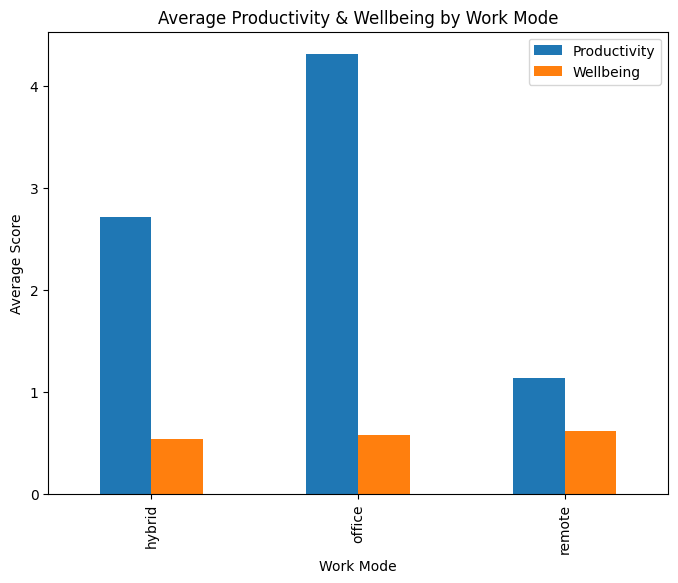

In [86]:
avg_productivity.plot(x='Current Working platform?', kind='bar', figsize=(8,6))
plt.title('Average Productivity & Wellbeing by Work Mode')
plt.xlabel('Work Mode')
plt.ylabel('Average Score')
plt.legend(['Productivity', 'Wellbeing'])
plt.show()

## 2. Department-Wise Analysis

In [87]:
df['departments'].value_counts()

departments
devops                163
ai engineer           156
software developer    148
product manager       140
support               138
qa                    134
data analyst          130
Name: count, dtype: int64

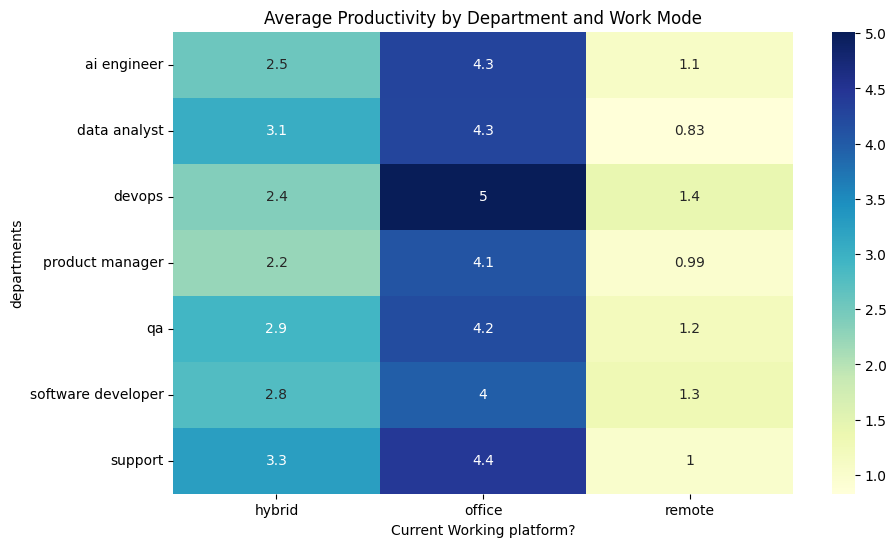

In [88]:
dept_mode = df.pivot_table(values='Productivity_Score', 
                           index='departments', 
                           columns='Current Working platform?', 
                           aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(dept_mode, annot=True, cmap='YlGnBu')
plt.title('Average Productivity by Department and Work Mode')
plt.show()


## 3. Work Hours and Experience Effect

### a) Working Hours vs Productivity

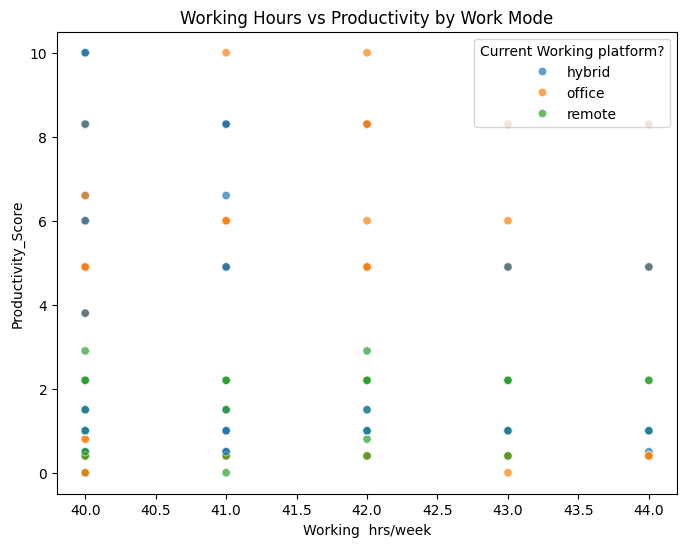

In [89]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Working  hrs/week', y='Productivity_Score', hue='Current Working platform?', alpha=0.7)
plt.title('Working Hours vs Productivity by Work Mode')
plt.show()

### b) Experience vs Productivity

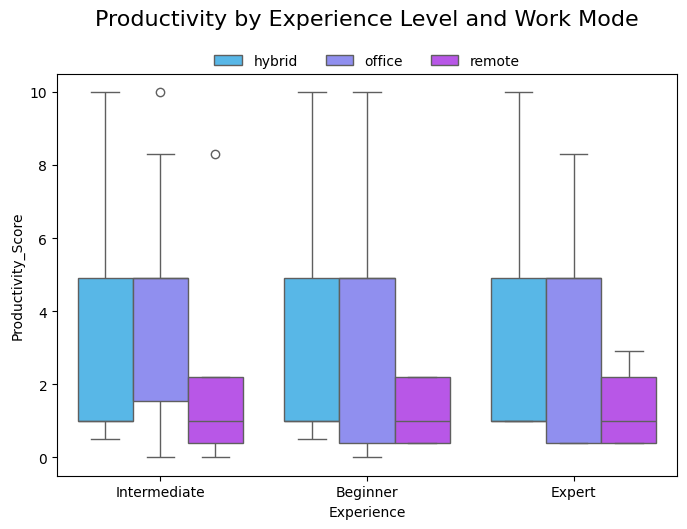

In [90]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Experience', y='Productivity_Score', hue='Current Working platform?', palette='cool')
plt.title('Productivity by Experience Level and Work Mode', pad=35, fontsize=16)
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.08),  
    ncol=3,
    frameon=False
)
plt.subplots_adjust(top=0.78)  # Lower top to make more space for title & legend
plt.show()

## 4. Statistical Analysis (ANOVA Test)

In [91]:
groups = [group["Productivity_Score"].values for name, group in df.groupby("Current Working platform?")]
f_stat, p_val = stats.f_oneway(*groups)

print("F-statistic:", round(f_stat, 3))
print("p-value:", round(p_val, 5))

if p_val < 0.05:
    print("✅ Significant difference in productivity between work modes.")
else:
    print("⚠️ No significant difference found.")

F-statistic: 112.91
p-value: 0.0
✅ Significant difference in productivity between work modes.


## 5. Correlation Analysis

In [92]:
df.select_dtypes(exclude='object').columns

Index(['Working  hrs/week', 'Effective working hours', 'Task_per_day',
       'Completed projects', 'Productivity_Score', 'wellbeing_score',
       'hire_date', 'months_tenure', 'hire_cohort'],
      dtype='object')

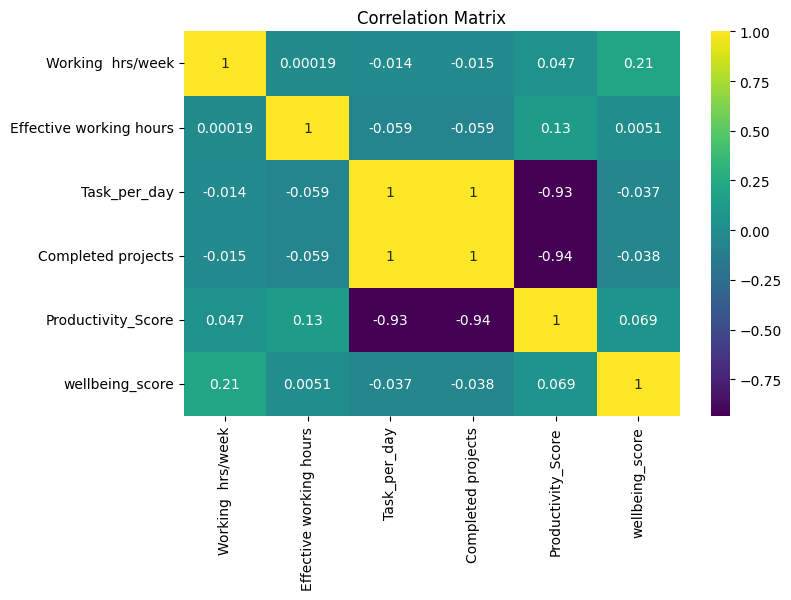

Productivity_Score         1.000000
Effective working hours    0.128627
wellbeing_score            0.068869
Working  hrs/week          0.047437
Task_per_day              -0.934895
Completed projects        -0.936796
Name: Productivity_Score, dtype: float64

In [93]:
num_cols = ['Working  hrs/week', 'Effective working hours', 'Task_per_day', 
             'Completed projects', 'Productivity_Score', 'wellbeing_score']

plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

# Top correlations
corr = df[num_cols].corr()
corr['Productivity_Score'].sort_values(ascending=False)

## 6. Overall Score

In [94]:
# Normalize Productivity and Wellbeing (0-1 scale)
df['prod_norm'] = (df['Productivity_Score'] - df['Productivity_Score'].min()) / \
                  (df['Productivity_Score'].max() - df['Productivity_Score'].min())

df['well_norm'] = (df['wellbeing_score'] - df['wellbeing_score'].min()) / \
                  (df['wellbeing_score'].max() - df['wellbeing_score'].min())

# Combined overall score (weight: 60% productivity, 40% wellbeing)
df['overall_score'] = df['prod_norm']*0.6 + df['well_norm']*0.4

In [95]:
mode_scores = df.groupby('Current Working platform?')['overall_score'].mean().reset_index()

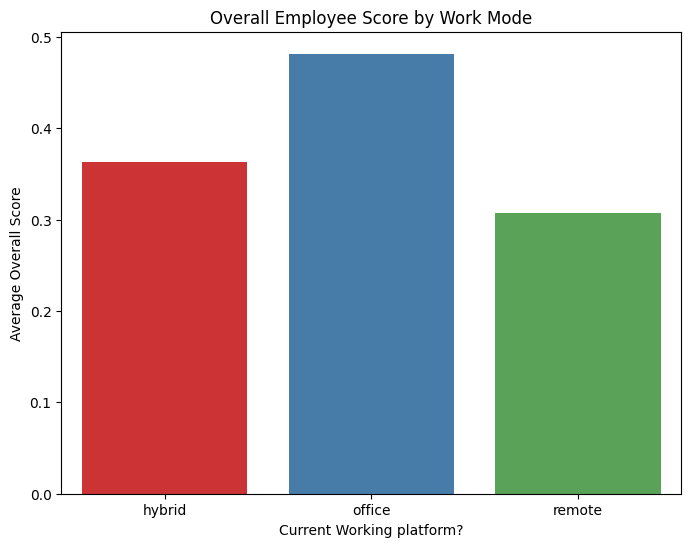

In [96]:
plt.figure(figsize=(8,6))
sns.barplot(x='Current Working platform?', y='overall_score', data=mode_scores, palette='Set1')
plt.title('Overall Employee Score by Work Mode')
plt.ylabel('Average Overall Score')
plt.show()

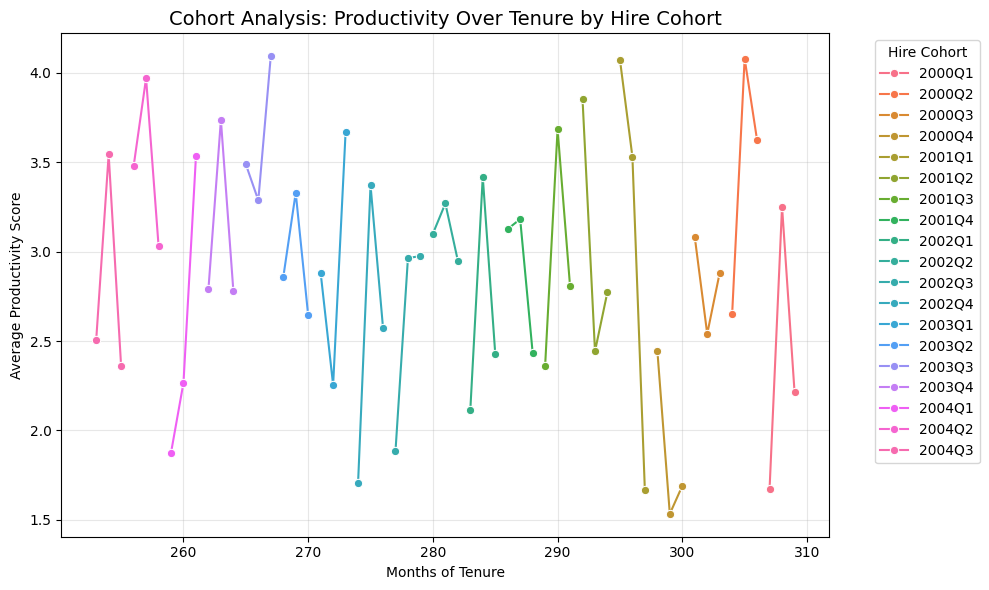

In [97]:
# --- Prepare data ---
cohort_df = (
    df.groupby(['hire_cohort', 'months_tenure'])['Productivity_Score']
      .mean()
      .reset_index()
)

# --- Plot ---
plt.figure(figsize=(10,6))
sns.lineplot(
    data=cohort_df,
    x='months_tenure',
    y='Productivity_Score',
    hue='hire_cohort',
    marker='o'
)

plt.title('Cohort Analysis: Productivity Over Tenure by Hire Cohort', fontsize=14)
plt.xlabel('Months of Tenure')
plt.ylabel('Average Productivity Score')
plt.legend(title='Hire Cohort', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

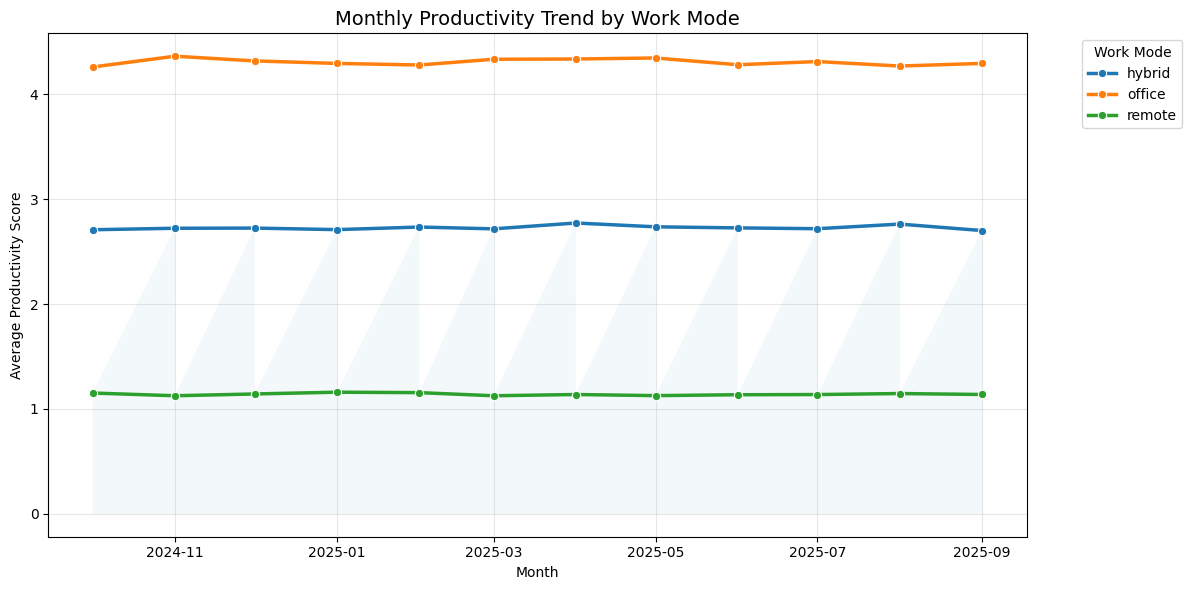

In [98]:
# --- Trend Analysis: average monthly productivity by work mode ---
trend_plot = (
    df_trend.groupby(['month', 'Current Working platform?'])['Productivity_Score']
      .mean()
      .reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=trend_plot,
    x='month',
    y='Productivity_Score',
    hue='Current Working platform?',
    linewidth=2.5,
    marker='o'
)

plt.fill_between(
    trend_plot['month'],
    trend_plot['Productivity_Score'],
    alpha=0.05
)

plt.title('Monthly Productivity Trend by Work Mode', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Productivity Score')
plt.legend(title='Work Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

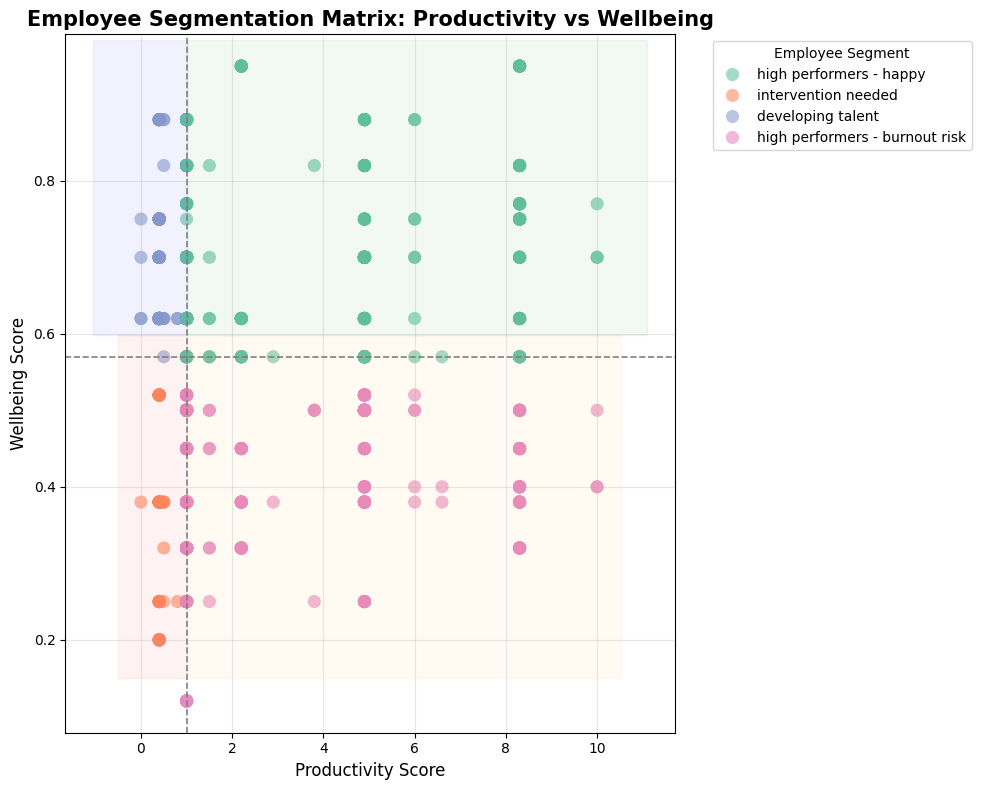

In [99]:
# Calculate medians
prod_median = df['Productivity_Score'].median()
well_median = df['wellbeing_score'].median()

# Create figure
plt.figure(figsize=(10, 8))

# Scatter plot
sns.scatterplot(
    data=df,
    x='Productivity_Score',
    y='wellbeing_score',
    hue='Employee_Segment',
    palette='Set2',
    s=90,
    alpha=0.6,
    edgecolor='none'
)

# Quadrant lines
plt.axvline(prod_median, color='gray', linestyle='--', linewidth=1.2)
plt.axhline(well_median, color='gray', linestyle='--', linewidth=1.2)

# Quadrant background shading (optional subtle highlight)
plt.axvspan(plt.xlim()[0], prod_median, plt.ylim()[0], well_median, color='red', alpha=0.05)    # Intervention Needed
plt.axvspan(prod_median, plt.xlim()[1], plt.ylim()[0], well_median, color='orange', alpha=0.05) # Burnout Risk
plt.axvspan(plt.xlim()[0], prod_median, well_median, plt.ylim()[1], color='blue', alpha=0.05)   # Developing Talent
plt.axvspan(prod_median, plt.xlim()[1], well_median, plt.ylim()[1], color='green', alpha=0.05)  # High Performers

# Labels & legend
plt.title('Employee Segmentation Matrix: Productivity vs Wellbeing', fontsize=15, fontweight='bold')
plt.xlabel('Productivity Score', fontsize=12)
plt.ylabel('Wellbeing Score', fontsize=12)
plt.legend(title='Employee Segment', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 7. Key Insights & Recommendations

In [100]:
best_mode = df.groupby('Current Working platform?')['Productivity_Score'].mean().idxmax()
corr_with_prod = corr['Productivity_Score'].sort_values(ascending=False)[1:3]

print("📊 Key Insights:")
print(f"- The {best_mode} employees have the highest average productivity.")
print(f"- Productivity is most correlated with {corr_with_prod.index[0]} (corr={corr_with_prod.values[0]:.2f}).")
print(f"- Wellbeing and productivity correlation: {corr.loc['Productivity_Score', 'wellbeing_score']:.2f}")

print("\n💡 Recommendations:")
print("- Encourage hybrid work models for roles showing higher productivity.")
print("- Optimize working hours to maintain wellbeing.")
print("- Provide workload balancing for departments with lower productivity.")


📊 Key Insights:
- The office employees have the highest average productivity.
- Productivity is most correlated with Effective working hours (corr=0.13).
- Wellbeing and productivity correlation: 0.07

💡 Recommendations:
- Encourage hybrid work models for roles showing higher productivity.
- Optimize working hours to maintain wellbeing.
- Provide workload balancing for departments with lower productivity.


In [101]:
df.columns

Index(['Emp_id', 'departments', 'location', 'Current Working platform?',
       'Preferred working platform', 'Working  hrs/week',
       'Effective working hours', 'Task_per_day', 'Completed projects',
       'Experience', 'prefer working in team or solo',
       'Does your team provide you support at work whenever needed?',
       'provide resources and tools', 'clear work objectives',
       'constructive feedback', 'training in hybrid work',
       'Productivity_Score', 'wellbeing_score', 'hire_date', 'months_tenure',
       'hire_cohort', 'Employee_Segment', 'prod_norm', 'well_norm',
       'overall_score'],
      dtype='object')